In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [ ]:
#read training dataset
train = pd.read_csv('https://raw.githubusercontent.com/16ejjmm/processed-data-/main/Final_Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/16ejjmm/processed-data-/main/Final_Test.csv')
Data = pd.get_dummies(train)
X = Data.loc[:, Data.columns != 'PotentialFraud']
y = Data['PotentialFraud']
holdout_Encoded = pd.get_dummies(test)
X.head(5)


,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,Provider_PRV57754,Provider_PRV57755,Provider_PRV57756,Provider_PRV57757,Provider_PRV57758,Provider_PRV57759,Provider_PRV57760,Provider_PRV57761,Provider_PRV57762,Provider_PRV57763
0,0,104640,5340.0,30.0,61,0.0,5,8,300,300,...,0,0,0,0,0,0,0,0,0,0
1,1,605670,66286.0,382.0,617,0.0,62,29,1560,1567,...,0,0,0,0,0,0,0,0,0,0
2,2,52170,310.0,0.0,362,0.0,0,23,1768,1782,...,0,0,0,0,0,0,0,0,0,0
3,3,280910,3700.0,0.0,2433,0.0,0,259,13872,13910,...,0,0,0,0,0,0,0,0,0,0
4,4,33710,3264.0,19.0,141,0.0,3,11,852,852,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Implementing SMOTE
# transform the dataset
sm = SMOTE(random_state=1)
X_sm, y_sm = sm.fit_resample(X, y)

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: PotentialFraud, dtype: float64

In [ ]:
#Instantiate Classifier Model 
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_split= 2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

In [ ]:
#Grid Search CV
max_depth = [3,4,5,6]
min_samples_split = [2,3,4,5]
criterion = ['entropy', 'gini']
scores =  {'f1':'f1', 'AUC': 'roc_auc','percision':'average_precision'}

params_dt = {
    'max_depth': max_depth, 
             'min_samples_split': min_samples_split, 
             'criterion': criterion
             }
grid_dt = GridSearchCV(estimator=dt, param_grid = params_dt, scoring=scores, cv=10, n_jobs=-1, refit='f1')

In [ ]:
#evaluating cross val score
cv_acc = cross_val_score(dt, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)

In [ ]:
#fit model 
grid_dt.fit(X_train, y_train)


In [ ]:
#generating test predictions
y_pred = grid_dt.predict(X_test)

In [ ]:
#Accuracy_Score 
accuracy_score(y_test, y_pred)

0.8863404689092762

In [ ]:
#CV Error accuracy
print(cv_qcc)

In [ ]:
#confusion Matrix
confusion_matrix(y_test, y_pred)

array([[838, 155],
       [ 68, 901]])

In [ ]:
#F1_score
f1_score(y_test, y_pred)

0.8898765432098765

In [ ]:
#percision Score
precision_score(y_test, y_pred)

0.853219696969697

In [ ]:
recall_score(y_test, y_pred)

0.9298245614035088

In [ ]:
roc_auc_score(y_test, y_pred)

0.8868659564318652

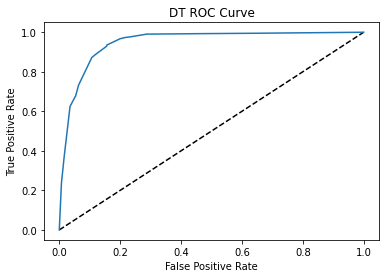

0.8868659564318652


In [ ]:
# AUC Curve 
dt_pred_prob = grid_dt.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, bc_thresholds = roc_curve(y_test, dt_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
grid_dt_auc = roc_auc_score(y_test, y_pred)
plt.show()
print(grid_dt_auc)

In [ ]:
best_params = grid_dt.best_params_
best_score = grid_dt.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
0.9095443276454255


In [ ]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       993
           1       0.85      0.93      0.89       969

    accuracy                           0.89      1962
   macro avg       0.89      0.89      0.89      1962
weighted avg       0.89      0.89      0.89      1962

